###  Step 1 Import libraries and Files

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
path = r"C:\Users\Azalia\Documents\Projects\Self-Study\CareerFoundry\Instacart Analysis"

In [3]:
df_ord_prod_cust = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'ord_prod_cust2.pkl'))

In [4]:
df_ord_prod_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   order_id                      int32   
 1   user_id                       object  
 2   order_number                  int8    
 3   order_day_of_week             int8    
 4   order_hour_of_day             int8    
 5   days_since_last_order         float16 
 6   NaN_Flag                      bool    
 7   product_id                    float16 
 8   add_to_cart_order             float16 
 9   reordered                     bool    
 10  product_name                  object  
 11  aisle_id                      int16   
 12  department_id                 int8    
 13  prices                        float32 
 14  _merge                        category
 15  price_range_loc               category
 16  busiest_day                   category
 17  updated_busiest_day           category
 18  

In [5]:
df_ord_prod_cust.describe()

,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,aisle_id,department_id,prices,max_order,ave_prices,median_days_since_last_order,age,num_dependents,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,30328763.0,32404859.0,32404859.0,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,32404854.0,3.240486e+07,3.240486e+07,3.240486e+07
mean,1.710745e+06,1.714230e+01,2.738867e+00,1.342515e+01,NaN,NaN,NaN,7.119612e+01,9.919792e+00,1.021125e+01,3.305217e+01,NaN,NaN,4.946527e+01,1.501896e+00,9.943773e+04
std,9.872988e+05,1.753532e+01,2.090077e+00,4.246380e+00,0.0,NaN,0.0,3.821139e+01,6.281485e+00,4.956361e+02,2.515525e+01,NaN,0.0,1.848558e+01,1.118865e+00,4.305727e+04
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,1.0,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.559470e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.0,13544.0,3.0,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.386719e+00,6.0,3.300000e+01,1.000000e+00,6.700400e+04
50%,1.711049e+06,1.100000e+01,3.000000e+00,1.300000e+01,8.0,25296.0,6.0,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.824219e+00,8.0,4.900000e+01,2.000000e+00,9.661800e+04
75%,2.565499e+06,2.400000e+01,5.000000e+00,1.600000e+01,15.0,37952.0,11.0,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.257812e+00,13.0,6.500000e+01,3.000000e+00,1.279120e+05
max,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,30.0,49696.0,145.0,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,2.500800e+04,30.0,8.100000e+01,3.000000e+00,5.939010e+05


### Step 2 Create charts from notes

#### Bar Chart

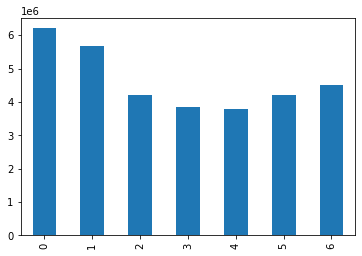

In [6]:
bar_orderday = df_ord_prod_cust['order_day_of_week'].value_counts().sort_index().plot.bar()

#### Histogram #1

<AxesSubplot:ylabel='Frequency'>

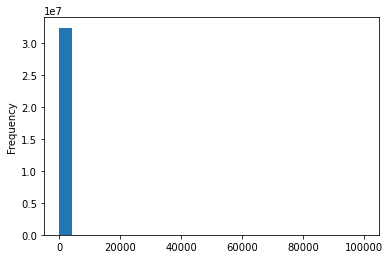

In [7]:
df_ord_prod_cust['prices'].plot.hist(bins = 25)

#### Scatterplot

<AxesSubplot:xlabel='prices', ylabel='prices'>

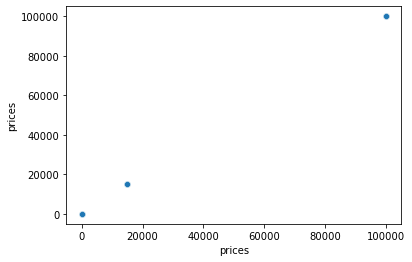

In [8]:
# plotting scatterplot to view outliers
sns.scatterplot(x = 'prices', y='prices', data=df_ord_prod_cust)

In [9]:
# displaying items with price >100
dfpricefix = df_ord_prod_cust.loc[df_ord_prod_cust['prices']>100]

In [10]:
# checking product list
dfpricefix[['user_id','product_id','department_id','product_name', 'prices']].head()

,user_id,product_id,department_id,product_name,prices
7805,1519,21552.0,16,Lowfat 2% Milkfat Cottage Cheese,14900.0
7806,1519,21552.0,16,Lowfat 2% Milkfat Cottage Cheese,14900.0
15143,2409,21552.0,16,Lowfat 2% Milkfat Cottage Cheese,14900.0
20264,3531,33664.0,16,2 % Reduced Fat Milk,99999.0
20497,3793,21552.0,16,Lowfat 2% Milkfat Cottage Cheese,14900.0


In [11]:
# fixing these values by turning it to nan using numpy
df_ord_prod_cust.loc[df_ord_prod_cust['prices']>100, 'prices'] = np.nan

In [12]:
# checking
df_ord_prod_cust['prices'].max()

25.0

#### Histogram #2

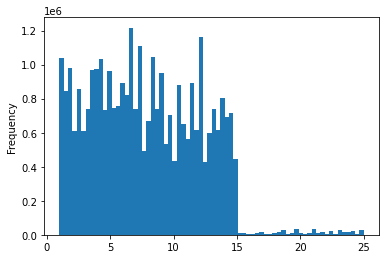

In [13]:
hist_prices = df_ord_prod_cust['prices'].plot.hist(bins=70)

#### Line Chart

In [14]:
# Create samples first for the line chart
np.random.seed(4)

In [15]:
# use 70-30 split for the samples
dev = np.random.rand(len(df_ord_prod_cust)) <=0.7

In [16]:
# Splitting into sample lists
df_big = df_ord_prod_cust[dev]
df_small = df_ord_prod_cust[~dev]

In [17]:
# checking results
len(df_big)+len(df_small)

32404859

In [18]:
len(df_ord_prod_cust)

32404859

In [19]:
# creating df of only necessary columns from df_small
df_small2 = df_small[['order_day_of_week','prices']]

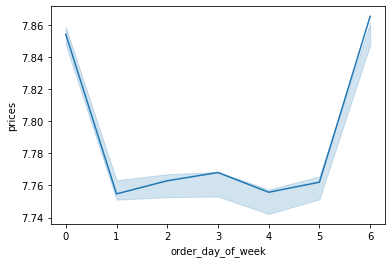

In [20]:
line_orderweek = sns.lineplot(x='order_day_of_week', y='prices', data=df_small2)

### Step 3 Histogram of sales

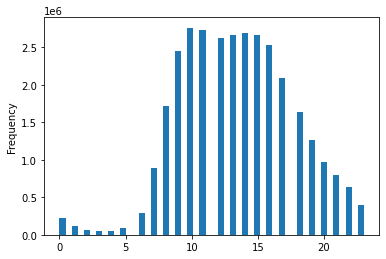

In [21]:
hist_orderhour = df_ord_prod_cust['order_hour_of_day'].plot.hist(bins=50)

The chart shows that orders mostly happens between hours 10 to 15 of the day

### Step 4 Bar chart of loyalty_flag

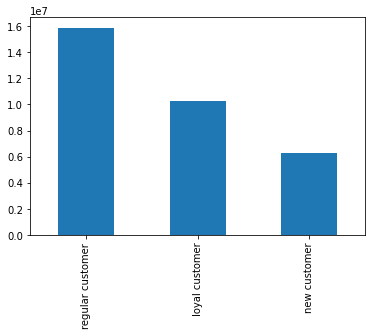

In [22]:
bar_loyalty = df_ord_prod_cust['loyalty_flag'].value_counts().plot.bar()

In [23]:
# Creating sample for prices based on 70-30
np.random.seed(10)
rand_list = np.random.rand(len(df_ord_prod_cust))<=0.7

In [24]:
df_big = df_ord_prod_cust[rand_list]
df_small = df_ord_prod_cust[~rand_list]

In [25]:
# creating df of only necessary columns from df_small
df_small_pricehr = df_small[['order_hour_of_day','prices']]

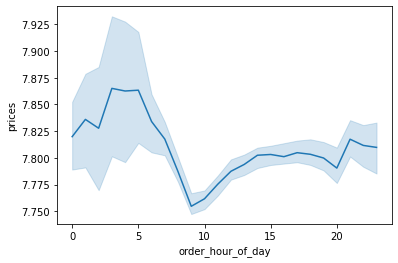

In [26]:
line_pricehour = sns.lineplot(x='order_hour_of_day', y='prices', data=df_small_pricehr)

There seem to be purchases on higher price items between the hours of 3 and 5 of the day.

### Step 6 Relationship between age and dependents

In [27]:
# creating df of only necessary columns from df_small
df_small_agedep = df_small[['age','num_dependents']]

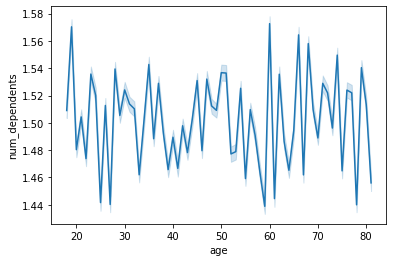

In [28]:
line_age_dependents = sns.lineplot(x='age', y='num_dependents', data=df_small_agedep)

The line chart shows the num of dependents predicted for each age. There is no trend or correlation between age and num of dependents.

### Step 7 Relationship between age and income

In [29]:
# creating df of only necessary columns from df_small
df_small_ageinc = df_small[['age','income']]

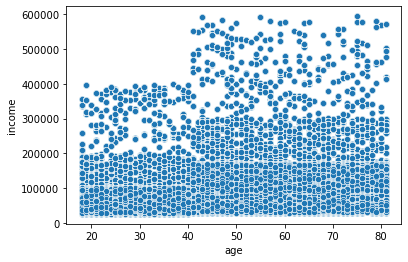

In [30]:
scatter_age_income = sns.scatterplot(x='age', y='income', data=df_small_ageinc)

The scatterplot shows that higher income of more than 400,000 are mostly held by people aged 40 onwards.

### Exporting Visualizations

In [ ]:
bar_orderday.figure.savefig(os.path.join(path,'04 Analysis','bar_orderday.png'))

In [ ]:
hist_prices.figure.savefig(os.path.join(path,'04 Analysis','hist_prices.png'))

In [ ]:
line_orderweek.figure.savefig(os.path.join(path,'04 Analysis','line_orderweek.png'))

In [ ]:
hist_orderhour.figure.savefig(os.path.join(path,'04 Analysis','hist_orderfreq_byhour.png'))

In [ ]:
bar_loyalty.figure.savefig(os.path.join(path,'04 Analysis','bar_loyaltycount.png'))

In [ ]:
line_pricehour.figure.savefig(os.path.join(path,'04 Analysis','line_pricehour.png'))

In [ ]:
line_age_dependents.figure.savefig(os.path.join(path,'04 Analysis','line_age_dependents.png'))

In [ ]:
scatter_age_income.figure.savefig(os.path.join(path,'04 Analysis','scatter_age_income.png'))